In [4]:
import pandas as pn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df=pn.read_csv('Salary_dataset.csv')

In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
df.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [8]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Text(0, 0.5, 'Salary')

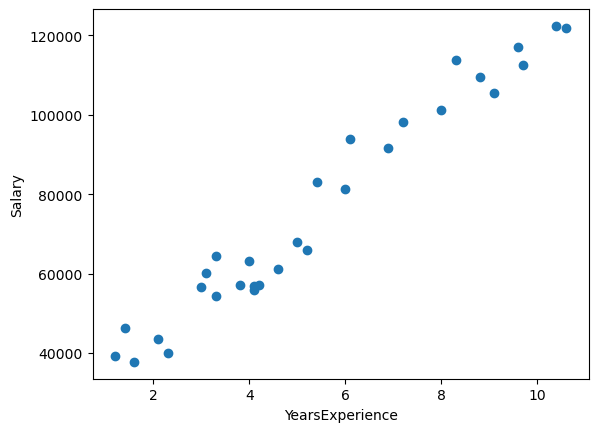

In [9]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [10]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


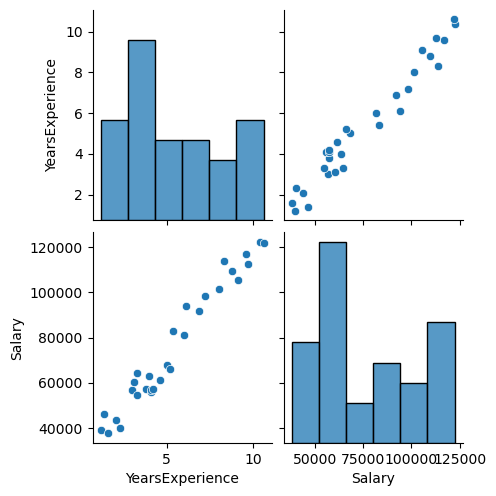

In [12]:
import seaborn as sn
sn.pairplot(df)


In [13]:
X = df[['YearsExperience']]
y = df['Salary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [15]:

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 38802588.99247062
Mean Absolute Error: 5056.995466663589
R-squared: 0.9347210011126783


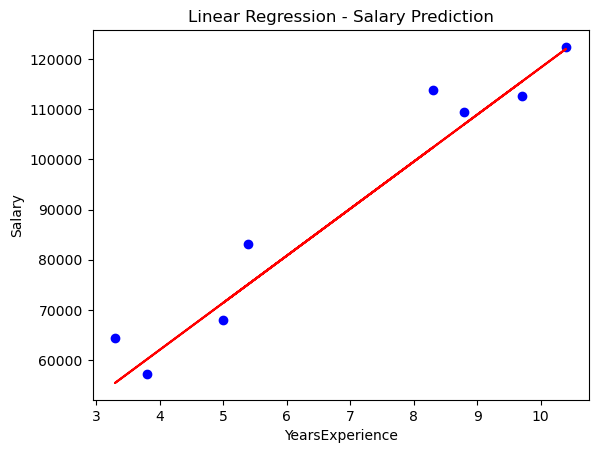

In [16]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Linear Regression - Salary Prediction")
plt.show()


In [17]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train_sm).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     428.3
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           5.62e-15
Time:                        23:13:06   Log-Likelihood:                -220.35
No. Observations:                  22   AIC:                             444.7
Df Residuals:                      20   BIC:                             446.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.454e+04   2525.909     